# BEMM461 Unemployment in the United Kingdom


## Table of Links
### Table
| Description | Link |
| -- | -- |
| Reflective blog | Insert Link here |
| Chosen Dataset | https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/datasets/unemploymentbyageanddurationnotseasonallyadjustedunem01nsa |
| Github Link | https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/datasets/unemploymentbyageanddurationnotseasonallyadjustedunem01nsa |

## Table of Contents
1. Introduction and Background of the project
2. Aim, Objective and Audience
3. All Dashboards in This Project (Code)
4. Articulation of Decision-Making Process
5. Review of Available Tools
6. Review of Analytics Methods Chosen
7. Visualization of Data with Accompanying Code
8. Conclusion
9. Reflective Evaluation
10. Bibliography

## 1. Introduction and Background of the project

Winkelmann (2014) identifies unemployment as a situation where people in the age range of over 16 are seeking a job but cannot find one. Moreover, unemployment also includes individuals who have appropriate work but are unpaid and those who are inactive due to sickness or a disability that prevents them from working. Furthermore, the unemployment rate, which reflects a country's economic situation, is typically calculated by dividing the number of unemployed individuals by the total number of people in the labour force. The data from ONS (2024a), shown in Figure 1, indicates that the number of unemployed people in the UK dramatically dropped by around 33% from 2014 to 2019 before increasing to 19,000 thousand people in 2021 due to the effects of the COVID-19 pandemic. However, the trend of unemployment in the UK shows a significant decline in 2024.
    
According to ONS (2024), the UK employment rate stands at 75%, showing growth over the last three months. However, it remains slightly below the estimate from a year ago. Similarly, the UK unemployment rate is 3.8%, which matches the rate from last year, while the economic inactivity rate is above estimates at 21.9% (ONS, 2024). If we consider the data insights, we find that the number of unemployed males is approximately 22% higher than the number of unemployed females over the past decade. Several factors may contribute to this figure. For example, males may have more opportunities to work than females, some females may lack the education needed to secure high-quality jobs, or workplace policies, such as gender-based salary differences, may play a role. Thus, this project aims to assist audiences who are concerned about unemployment trends by analyzing the trend insights into each age group and gender using data from ONS (2024a) through clear and efficient dashboards.

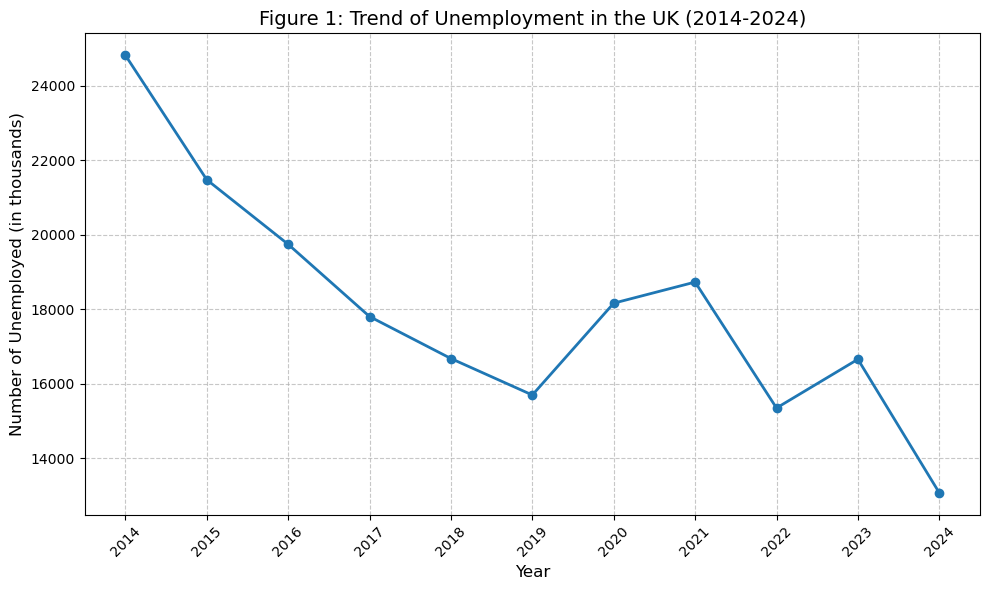

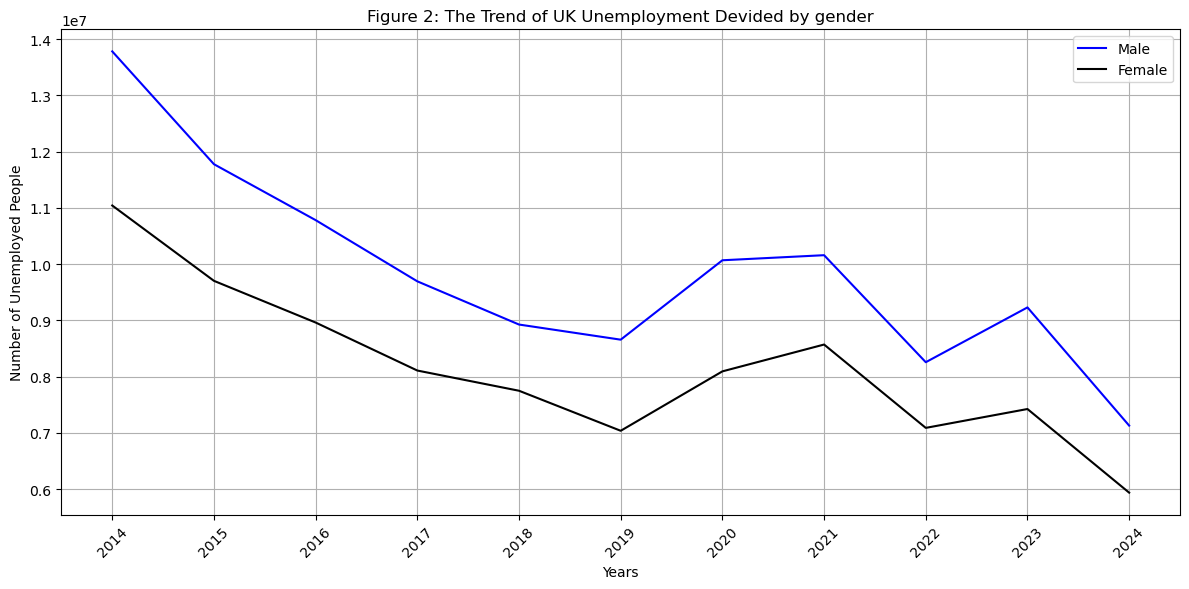

In [2]:
# Figure 1: Overall Trend of Unemployment in the UK from 2014 to 2024
# import tools
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS1.csv'
data = pd.read_csv(file_path)

# Cleaning and preparing the data
data['Unemployment'] = data['Unemployment'].str.replace(',', '').astype(int)
data['Year'] = data['Year'].astype(int)

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Unemployment'], marker='o', linestyle='-', linewidth=2)
plt.title('Figure 1: Trend of Unemployment in the UK (2014-2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Unemployed (in thousands)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(data['Year'], rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

# Figure2: Overall Trend of Unemployment in the UK Based on Genders.
# Step 1: Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data = pd.read_csv(file_path)

# Step 2: Filter data for 'All aged 16 & over'
male_data = data[(data['Age'] == 'All aged 16 & over') & (data['Gender'] == 'Male')].iloc[0]
female_data = data[(data['Age'] == 'All aged 16 & over') & (data['Gender'] == 'Female')].iloc[0]

# Extract years and values
years = male_data.index[2:]  # Start from the 3rd column, which has the years
male_values = male_data.values[2:].astype(float)
female_values = female_data.values[2:].astype(float)

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.plot(years, male_values, label='Male', color='blue')
plt.plot(years, female_values, label='Female', color='black')

# Step 4: Customize the chart
plt.title('Figure 2: The Trend of UK Unemployment Devided by gender')
plt.xlabel('Years')
plt.ylabel('Number of Unemployed People')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Step 5: Display the chart
plt.show()

## 2. Aim, Objective and Audience

#### The Aim of this research

This project aims to investigate unemployment data from 2014 to 2024, categorized by different age groups and gender, as well as the duration of unemployment: short-term (up to 6 months), medium-term (more than 6 months but not exceeding 12 months), and long-term (more than 12 months). The goal is to identify labour market trends and analyze the data.

#### The Objective

1. Visual 1 - Comparison of Unemployment Levels Between Male and Female: To understand the variability of unemployment among genders. 
2. Visual 2 - Comparison of Mean Unemployment for Each Level: To understand the distribution of short-term, medium-term and long-term unemployment duration to gauge the persistence of joblessness.
3. Visual 3 - Stacked Bar Chart: Unemployment Levels by Age (Filtered): To Evaluate insight into the level of unemployment in each age group.

#### The Target Audience

The target audience of this project includes government economic or policy analysts who aim to reduce the unemployment rate and plan to mitigate skill gaps. Furthermore, in the corporate sector, managers in departments such as HR, workforce planning, business strategy, market analysis, and training and development are also part of the target audience. These professionals are interested in labour market trends to help them improve and leverage employee skills, design educational programs, and evaluate customers’ behaviour.

To achieve the objective, the dashboards will present trends and averages of UK unemployment insights across genders and age groups, highlighting the levels of unemployment for each gender and age group. This will provide a clear perspective on UK unemployment trends.

## 3. All Dashboards in This Project (Code)

The code for creating all dashboards used in this project is provided in the section below.

In [7]:
import pandas as pd
import plotly.graph_objects as go
import dash 
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

# Initialize the Dash app with a Bootstrap theme
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ---------------------------------------------------
# ---------------------------------------------------
# Chart 1: Overall Trend of Unemployment in the UK
file_path1 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS1.csv'
data1 = pd.read_csv(file_path1)
data1['Unemployment'] = data1['Unemployment'].str.replace(',', '').astype(int)
data1['Year'] = data1['Year'].astype(int)

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=data1['Year'], y=data1['Unemployment'], mode='lines+markers', name='Unemployment'))
fig1.update_layout(
    title='Figure 1: Trend of Unemployment in the UK (2014-2024)',
    xaxis_title='Year',
    yaxis_title='Number of Unemployed (in thousands)',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 2: Trend of Unemployment by Gender
file_path2 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data2 = pd.read_csv(file_path2)

male_data = data2[(data2['Age'] == 'All aged 16 & over') & (data2['Gender'] == 'Male')].iloc[0]
female_data = data2[(data2['Age'] == 'All aged 16 & over') & (data2['Gender'] == 'Female')].iloc[0]

years = male_data.index[2:]
male_values = male_data.values[2:].astype(float)
female_values = female_data.values[2:].astype(float)

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=years, y=male_values, mode='lines+markers', name='Male', line=dict(color='blue')))
fig2.add_trace(go.Scatter(x=years, y=female_values, mode='lines+markers', name='Female', line=dict(color='black')))
fig2.update_layout(
    title='Figure 2: The Trend of UK Unemployment Divided by Gender',
    xaxis_title='Years',
    yaxis_title='Number of Unemployed People',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 3: Violin Plot of Unemployment Levels
data3_melted = pd.melt(data2, id_vars=['Age', 'Gender'], var_name='Year', value_name='Unemployment')
data3_melted['Unemployment'] = data3_melted['Unemployment'].astype(int)
filtered_data3 = data3_melted[~data3_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

fig3 = go.Figure()

# Add Male trace
fig3.add_trace(go.Violin(
    x=filtered_data3['Gender'][filtered_data3['Gender'] == 'Male'],
    y=filtered_data3['Unemployment'][filtered_data3['Gender'] == 'Male'],
    name='Male',
    box_visible=True,
    points='all',
    meanline_visible=True,
    line_color='blue',
    fillcolor='rgba(0, 0, 255, 0.5)'  # Light blue fill
))

# Add Female trace
fig3.add_trace(go.Violin(
    x=filtered_data3['Gender'][filtered_data3['Gender'] == 'Female'],
    y=filtered_data3['Unemployment'][filtered_data3['Gender'] == 'Female'],
    name='Female',
    box_visible=True,
    points='all',
    meanline_visible=True,
    line_color='pink',
    fillcolor='rgba(255, 105, 180, 0.5)'  # Light pink fill
))

# Update layout
fig3.update_layout(
    title='Figure 3: Comparison of Unemployment Levels Between Male and Female',
    xaxis_title='Gender',
    yaxis_title='Number of Unemployed',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 4: Box Plot of Mean Unemployment Levels
file_path4 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM2.csv'
data4 = pd.read_csv(file_path4)
data4_melted = pd.melt(data4, id_vars=['Age', 'Gender', 'Level'], var_name='Year', value_name='Unemployment')
data4_melted['Unemployment'] = data4_melted['Unemployment'].astype(int)
combined_data4 = data4_melted.groupby(['Level', 'Year'])['Unemployment'].mean().reset_index()

fig4 = go.Figure()
for level in combined_data4['Level'].unique():
    filtered = combined_data4[combined_data4['Level'] == level]
    fig4.add_trace(go.Box(y=filtered['Unemployment'], name=level))
fig4.update_layout(
    title='Figure 4: Comparison of Mean Unemployment for Each Level',
    xaxis_title='Level of Unemployment',
    yaxis_title='Mean Unemployment',
    template='plotly_white'
)

# ---------------------------------------------------
# Chart 5: Stacked Bar Chart of Unemployment Levels by Age
file_path5 = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS3.csv'
data5 = pd.read_csv(file_path5)

# Filter out rows for 'All aged 16 & over' and 'All aged 16 to 64'
filtered_data5 = data5[~data5['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

# Melt the filtered data for visualization
data5_melted = pd.melt(filtered_data5, id_vars=['Age', 'Level'], var_name='Year', value_name='Unemployment')
data5_melted['Unemployment'] = data5_melted['Unemployment'].astype(int)

# Grouping the Data
grouped_data5 = data5_melted.groupby(['Age', 'Level'])['Unemployment'].sum().unstack()

# Calculate 100% Stacked Data
grouped_data5_percentage = grouped_data5.div(grouped_data5.sum(axis=1), axis=0) * 100

# Define Custom Colors Matching Your Image
custom_colors = {
    'All over 12 months': '#5A5A8E',   # Dark Purple
    'All over 24 months': '#2E77B8',   # Blue
    'Over 6 and up to 12 months': '#74B873',  # Green
    'Up to 6 months': '#F7D64B'        # Yellow
}

# Create Regular Stacked Bar Chart
fig5 = go.Figure()
for col in grouped_data5.columns:
    fig5.add_trace(go.Bar(
        x=grouped_data5.index,
        y=grouped_data5[col],
        name=col,
        marker_color=custom_colors[col]
    ))

fig5.update_layout(
    title='Figure 5: Stacked Bar Chart: Unemployment Levels by Age',
    xaxis_title='Age Group',
    yaxis_title='Number of Unemployed',
    barmode='stack',
    template='plotly_white',
    legend_title='Level'
)

# Create 100% Stacked Bar Chart
fig6 = go.Figure()
for col in grouped_data5_percentage.columns:
    fig6.add_trace(go.Bar(
        x=grouped_data5_percentage.index,
        y=grouped_data5_percentage[col],
        name=col,
        marker_color=custom_colors[col]
    ))

fig6.update_layout(
    title='Figure 6: 100% Stacked Bar Chart: Unemployment Levels by Age',
    xaxis_title='Age Group',
    yaxis_title='Percentage of Unemployment',
    barmode='stack',
    template='plotly_white',
    legend_title='Level'
)

# Display Both Charts Side-by-Side
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

# Initialize the Dash App
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("UK Unemployment Analysis Dashboard", className="mb-4 text-center"), width=12)
    ]),
    
    # Regular Stacked Bar Chart
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig5), width=6),
        dbc.Col(dcc.Graph(figure=fig6), width=6),
    ], className="mb-4"),
    
], fluid=True)

# ---------------------------------------------------
# Layout of the Dashboard
try:
    # Code that might raise an exception
    result = 10 / 0  # Example of an error (division by zero)
except Exception as e:  # Correct syntax
    print(f"An error occurred: {e}")
# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

    # Layout
app.layout = dbc.Container([
        dbc.Row([
            dbc.Col(html.H1("Dashboard for Visualizing Data", className="text-center mb-4"), width=12)
        ]),
        dbc.Row([
            dbc.Col(dcc.Graph(figure=fig1), width=6),
            dbc.Col(dcc.Graph(figure=fig2), width=6),
            dbc.Col(dcc.Graph(figure=fig3), width=6),
            dbc.Col(dcc.Graph(figure=fig4), width=6),
            dbc.Col(dcc.Graph(figure=fig5), width=6),
            dbc.Col(dcc.Graph(figure=fig6), width=6)
        ]),
    ], fluid=True)

    # Run the app
# Run the app
if __name__ == '__main__':
    app.run(jupyter_mode="external", debug=True)

An error occurred: division by zero
Dash app running on http://127.0.0.1:8050/


## 4. Articulation of Decision-Making Process

#### Key Principle

The UK unemployment data contains complex details and insights. To help the audience easily understand and use this visualization effectively, my dashboard design incorporates various visualization principles to enhance clarity, usability, and overall effectiveness, with a specific focus on analyzing UK unemployment trends.

Norman’s Seven Stages of Action inform the user flow by guiding them to establish goals for understanding UK unemployment trends, decide which visualizations to examine, and analyze key insights, such as gender differences using violin charts or age-related patterns through stacked bar charts (Bhat et al., 2023). For example, the violin chart demonstrates greater variability in male unemployment rates, while the box plot emphasizes notable short-term unemployment levels across different time frames.

Tufte's principle of maximizing the data-ink ratio ensures the dashboard focuses on meaningful insights without unnecessary clutter (Hill et al., 2018). For example, in the line chart showing UK unemployment trends from 2014 to 2024, minimal distractions allow users to clearly observe fluctuations caused by economic changes, such as the COVID-19 pandemic spike. 

Preattentive processing principles allow users to quickly identify patterns (Healey et al., 1995), such as the dominance of short-term unemployment in younger age groups (16-24) through the distinct yellow color in the stacked bar charts. This enhances understanding at a glance. 

Drawing on the Baddeley and Hitch working memory model, the dashboard reduces cognitive overload by limiting categories, using clean layouts, and focusing on concise visual comparisons (Sepp et al., 2019). 

Finally, the use of categorical scales like nominal (gender) and interval (unemployment levels) ensures the most suitable visualizations are employed, such as bar charts for age-specific comparisons and line charts for trends over time (Few, 2005). These theories collectively enhance the dashboard's ability to communicate UK unemployment trends effectively and support rapid, informed decision-making.

#### Key Step

The UK Unemployment Analysis Dashboard uses clear visualization principles to highlight key insights effectively. At the top, a line chart (Figure 1) illustrates overall UK unemployment trends (2014–2024), showing a general decline with notable spikes like during COVID-19. Next, Figure 2 breaks down unemployment by gender, using contrasting colors to reveal consistently higher male rates, aiding quick interpretation. The middle section features a violin plot (Figure 3), comparing gender unemployment distributions with variability, aligned with Tufte’s minimalist design principles. A box plot (Figure 4) categorizes unemployment by duration, emphasizing short-term dominance while highlighting long-term outliers. At the bottom, stacked bar charts (Figures 5 and 6) analyze age-specific unemployment, showing younger groups with short-term dominance and older groups with persistent long-term issues. This structured design ensures actionable insights for policymakers

#### Dashboard Layout


The UK Unemployment Analysis Dashboard applies visualization principles for clear, effective insights. At the top, Figure 1 depicts unemployment trends (2014–2024), highlighting a general decline with spikes during disruptions like COVID-19. Next, Figure 2 shows gender disparities using contrasting colors, revealing higher unemployment among males and enabling quick recognition through preattentive processing. The middle section features a violin plot (Figure 3) comparing gender-based unemployment distributions, showcasing variability while following Tufte’s minimalist design principles. A box plot (Figure 4) highlights unemployment durations, showing the dominance of short-term unemployment and outliers in long-term cases. At the bottom, stacked bar charts (Figures 5 and 6) break down unemployment by age, revealing short-term challenges for younger groups and persistent long-term issues for older individuals. The structured layout ensures policymakers can easily interpret trends, gender, duration, and age-specific insights.

## 5. Review of Available Tools

I chose Python for this project due to its powerful capabilities and versatility, making it suitable for both beginners and professionals (Vinothraj, T., 2019). To analyze UK unemployment trends, I utilized libraries like Pandas, Matplotlib, and Seaborn to create the dashboard. The suitability of these tools for my objectives is discussed below.

Pandas is a versatile Python library ideal for data analysis in unemployment projects. It simplifies tasks like loading data with pd.read_csv(), reshaping with pd.melt(), and cleaning values using astype(int) or filtering categories. Its groupby() function enables aggregating data for meaningful comparisons, such as unemployment trends by age or duration. Seamlessly integrating with visualization tools, Pandas prepares clean data for charts like violin plots and stacked bar charts. While efficient for structured data, it struggles with very large datasets, and this can be challenging.

Matplotlib is a powerful Python library for creating static visualizations, ideal for unemployment analysis projects. It supports diverse charts like violin plots, box plots, and stacked bar charts, helping analyze trends across gender, age, and unemployment durations. Matplotlib integrates well with Pandas for direct plotting, enhancing workflows for tasks like stacked bar charts. Features such as plt.title(), tight_layout(), and grid adjustments improve clarity and presentation. While its syntax can be verbose and it lacks interactivity, Matplotlib excels in producing clear, professional-quality visualizations for analytical insights.

Seaborn is a powerful Python library for visualizing UK unemployment trends, offering polished statistical graphics with ease. Its integration with Pandas simplifies handling structured data, as seen in violin and box plots comparing unemployment levels by gender and age. Functions like sns.violinplot() and sns.boxplot() highlight trends and variability, such as higher male unemployment variability. With built-in themes and palettes (e.g., palette='muted'), Seaborn ensures professional aesthetics. Though limited for non-structured data and large datasets, its simplicity makes it ideal for clear unemployment insights.

#### The alternative tools to address the limitations of the tools I have chosen.

If free tools were available for use in my project, I would consider the following:

SQL: SQL is a better option than the Pandas library in Python for managing and querying large datasets. It enables efficient data storage, retrieval, and filtering within relational databases, offering scalability and improved performance when handling large volumes of data.

Power BI: Power BI provides interactive dashboards and visualizations, allowing users to analyze data dynamically. Its drag-and-drop functionality and real-time updates address the limitations of Matplotlib in Python, making it an excellent choice for presentations and interactive unemployment analyses.

Tableau: Tableau is highly effective for visualizing large datasets and offers interactivity, making it ideal for examining unemployment trends. Its user-friendly interface and compatibility with multiple data sources make it a superior tool for creating dynamic, accessible visualizations.


## 6. Review of Analytics Methods Chosen

The UK Unemployment Analysis Dashboard utilizes a variety of visualization methods to effectively convey data and address user requirements. Each approach focuses on distinct elements of unemployment trends, delivering clear and actionable insights.

#### Violin Plot: Comparing Gender Distributions

Violin Plot: Comparing Gender Distributions
The violin plot provides a detailed comparison of unemployment levels between males and females, showcasing differences in data distribution. The width reflects density and variability, with narrower sections indicating concentrated rates. The white dot marks the median unemployment rate, while the thick vertical bar (IQR) illustrates variability—smaller IQRs suggest steadier trends. Tails reveal extreme values, with longer tails indicating higher unemployment at the extremes. This design adheres to Tufte’s principle of maximizing data-ink ratio (thedoublethink, 2016), presenting key details without unnecessary elements, while revealing gender disparities effectively.

#### Box Plot: Highlighting Variability and Outliers

Box plots summarize unemployment trends by showing medians, variability, and outliers. The box (IQR) represents the middle 50% of data, with narrower boxes indicating stability and wider ones highlighting variability. The central line marks the median, while whiskers extend to show ranges, excluding outliers, which appear as individual points. By aligning with Munzner’s emphasis on data-specific designs (Munzner, 2014), box plots effectively compare male and female unemployment, reinforcing that males face greater variability and employment challenges.

#### Stacked Bar Charts: Absolute and Proportional Comparisons

Stacked bar charts display absolute unemployment levels, showing total burdens across categories, while 100% stacked bar charts focus on proportional distribution, standardizing data for easier comparisons. The latter reveals age-specific trends, showing that younger groups face short-term unemployment challenges, while older individuals struggle with long-term unemployment. These charts are particularly useful for policymakers, offering insights into total and proportional unemployment burdens.

In summary, the dashboard’s visualization techniques prioritize clarity, maintain data accuracy, and address user requirements, providing a thorough understanding of unemployment trends to support informed policymaking.


## 7. Visualization of Data with Accompanying Code

There are three main crucial ideas that the dashboard presents to the audience, reflecting on UK unemployment.

#### Figure 3: Comparison of Unemployment Levels Between Male and Female.

This pair plot illustrates unemployment levels for males (left) and females (right). The small white dot represents the median unemployment level. Male unemployment shows greater variability, with extreme values reaching the higher end of the distribution. In contrast, female unemployment is more concentrated, with fewer extreme cases. The median unemployment level for males is higher, indicating that, on average, more males are unemployed. The wider range in male unemployment reflects a more dispersed trend, while the narrower distribution for females suggests greater consistency and stability. Overall, females experience lower and more stable unemployment levels compared to males, who face both higher averages and greater variability.

#### Figure 4: Comparison of Mean Unemployment for Each Level.

The box plot compares UK unemployment across four categories: "Up to 6 months," "Over 6 and up to 12 months," "All over 12 months," and "All over 24 months." The "Up to 6 months" category has the highest median unemployment level (around 2.5 million) and a wider interquartile range (IQR), indicating higher variability. This reflects that short-term unemployment dominates UK trends, likely influenced by temporary economic changes or seasonal factors. The "Over 6 and up to 12 months" and "All over 24 months" categories show lower medians (below 1 million) and narrower IQRs, indicating more stability. Although less frequent, long-term unemployment is concerning due to its persistence, highlighting reintegration challenges. Short-term unemployment, while more prevalent, demonstrates quicker recovery trends.

#### Figure 5 and 6: Stacked Bar Chart: Unemployment Levels by Age (Filtered).

These stacked bar charts display UK unemployment levels by age (16-17, 18-24, 25-49, 50 and over) and duration. The first chart (absolute values) shows the 25-49 age group has the highest unemployment, dominated by short-term durations ("Up to 6 months"). The 18-24 group reflects significant unemployment, particularly in short durations, likely due to early career instability. The 50 and over group has lower overall unemployment but a higher proportion of long-term durations ("All over 12 months"), highlighting workforce reentry challenges. The normalized chart (percentages) emphasizes short-term unemployment in younger groups (16-24) and long-term challenges for older individuals (50+). These visualizations reveal distinct age-specific unemployment patterns in the UK.

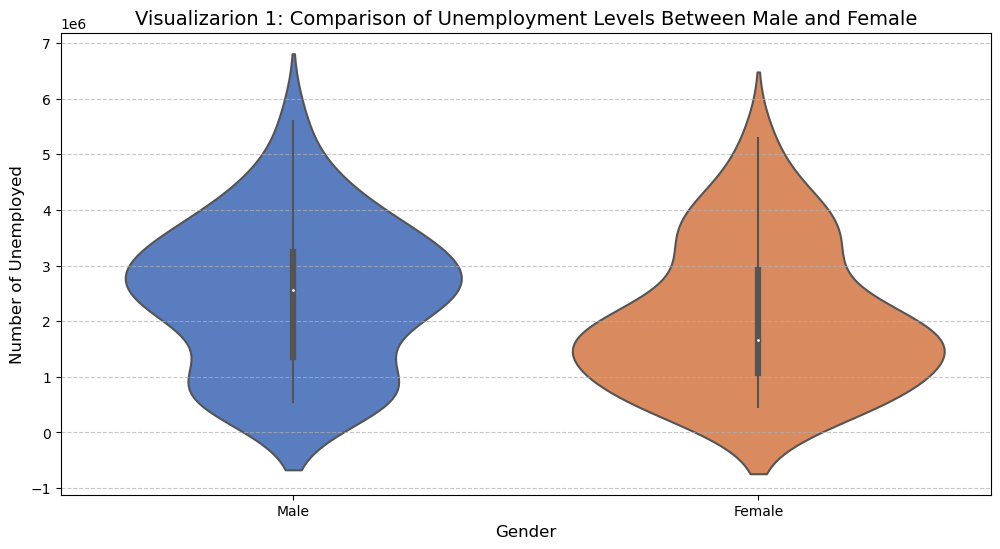

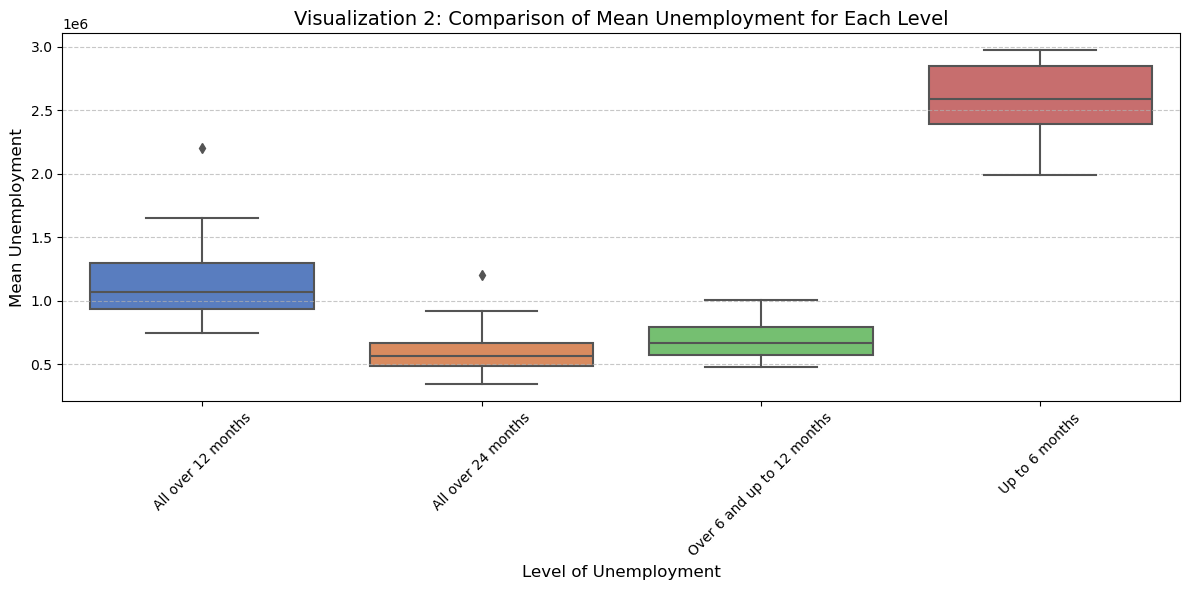

<Figure size 1200x600 with 0 Axes>

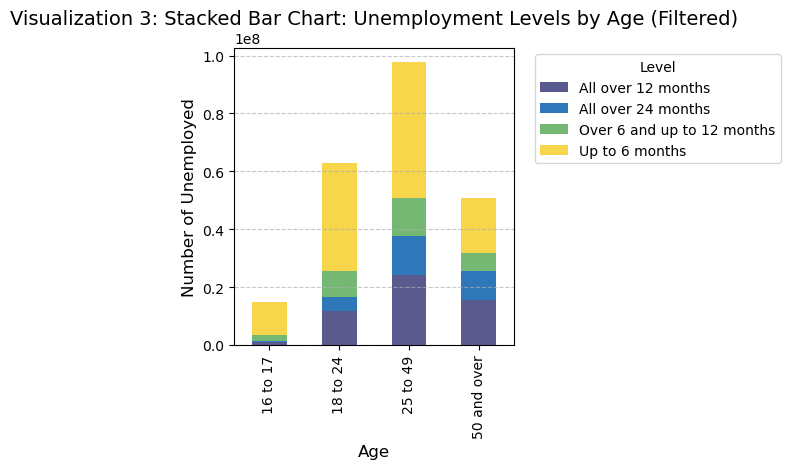

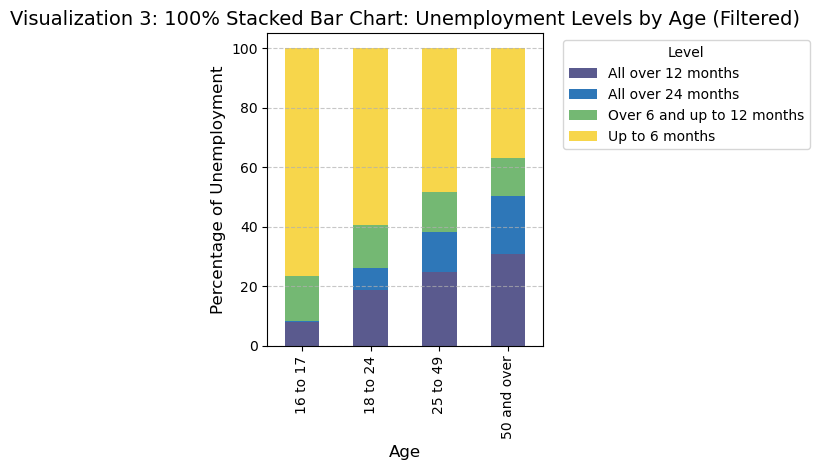

In [6]:
# Figure 3: Comparison of Unemployment Levels Between Male and Female.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM1.csv'
data = pd.read_csv(file_path)

# Reshaping and cleaning the data
data_melted = pd.melt(data, id_vars=['Age', 'Gender'], var_name='Year', value_name='Unemployment')
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Filtering out unwanted age categories like 'All aged 16 & over' and 'All aged 16 to 64'
filtered_data = data_melted[~data_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

# Plotting a violin plot to compare unemployment between male and female
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_data, x='Gender', y='Unemployment', palette='muted')
plt.title('Visualizarion 1: Comparison of Unemployment Levels Between Male and Female', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Unemployed', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Figure 4: Comparison of Mean Unemployment for Each Level
# Load the dataset
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VSFM2.csv'
data = pd.read_csv(file_path)

# Melt the data to long format for easier manipulation
data_melted = pd.melt(
    data,
    id_vars=['Age', 'Gender', 'Level'],
    var_name='Year',
    value_name='Unemployment'
)

# Convert 'Unemployment' to numeric type
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Combine male and female data by grouping over Level
combined_data = data_melted.groupby(['Level', 'Year'])['Unemployment'].mean().reset_index()

# Plot: Box plot to compare mean unemployment for each level
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Level', y='Unemployment', palette='muted')
plt.title('Visualization 2: Comparison of Mean Unemployment for Each Level', fontsize=14)
plt.xlabel('Level of Unemployment', fontsize=12)
plt.ylabel('Mean Unemployment', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Figure 5: Stacked Bar Chart: Unemployment Levels by Age (Filtered)
# Load the CSV file
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM461 Visualisation/Final Project/Coding/VS3.csv'
data = pd.read_csv(file_path)

# Reshaping and cleaning the data
data_melted = pd.melt(data, id_vars=['Age', 'Level'], var_name='Year', value_name='Unemployment')
data_melted['Year'] = data_melted['Year'].astype(int)
data_melted['Unemployment'] = data_melted['Unemployment'].astype(int)

# Filtering out unwanted age groups
filtered_data = data_melted[~data_melted['Age'].isin(['All aged 16 & over', 'All aged 16 to 64'])]

# Grouping the filtered data by age and level
grouped_data_filtered_by_age = filtered_data.groupby(['Age', 'Level'])['Unemployment'].sum().unstack()

# Preparing data for 100% stacked bar plots by age
stacked_data_filtered_by_age = grouped_data_filtered_by_age.div(grouped_data_filtered_by_age.sum(axis=1), axis=0) * 100

# Custom color palette similar to the desired chart
custom_colors = {
    'All over 12 months': '#5A5A8E',  # Dark purple
    'All over 24 months': '#2E77B8',  # Blue
    'Over 6 and up to 12 months': '#74B873',  # Green
    'Up to 6 months': '#F7D64B'  # Yellow
}

# Plotting Stacked Bar Chart by Age (filtered) with consistent colors
plt.figure(figsize=(12, 6))
grouped_data_filtered_by_age.plot(
    kind='bar', 
    stacked=True, 
    color=[custom_colors[col] for col in grouped_data_filtered_by_age.columns]
)
plt.title('Visualization 3: Stacked Bar Chart: Unemployment Levels by Age (Filtered)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Unemployed', fontsize=12)
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting 100% Stacked Bar Chart by Age (filtered) with consistent colors
stacked_data_filtered_by_age.plot(
    kind='bar', 
    stacked=True, 
    color=[custom_colors[col] for col in stacked_data_filtered_by_age.columns]
)
plt.title('Visualization 3: 100% Stacked Bar Chart: Unemployment Levels by Age (Filtered)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Percentage of Unemployment', fontsize=12)
plt.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 8. Conclusion

The UK Unemployment Analysis Dashboard offers a detailed view of unemployment trends, using data visualization to improve understanding and support decision-making. By applying principles from Tufte, Munzner, and Norman, the dashboard focuses on clear and user-friendly designs to effectively present key insights.

The visualization examines unemployment patterns across gender, age groups, and durations, revealing important trends and differences. For example, violin plots show that male unemployment is not only higher but also more varied than female unemployment, highlighting gender-specific challenges in achieving job stability. Box plots further explore the spread and outliers across short-term, medium-term, and long-term unemployment, showing that short-term unemployment is most common and tends to recover faster. Stacked bar charts focus on unemployment by age, showing short-term unemployment is more frequent in younger groups, while older individuals face ongoing challenges with long-term unemployment.

The dashboard follows important visualization principles, such as Tufte’s idea of maximizing the data-ink ratio to remove unnecessary details and focus on key information. It also uses Munzner’s data-specific design approach, tailoring each visualization to fit the audience and the data. Additionally, it incorporates Norman’s Seven Stages of Action, helping users set goals, compare data, and draw meaningful conclusions.

In summary, the dashboard makes complex unemployment data easier to understand and provides useful insights for policymakers and industry professionals. It serves as a practical tool for tackling unemployment challenges, creating strategies to reduce joblessness, and improving workforce stability, bridging the gap between data complexity and real-world solutions.

## 9. Reflective Evaluation

At the start of this project, one of the biggest challenges was finding the right data and choosing the best type of dashboard to use. Although UK unemployment is a widely discussed topic in articles and journals, finding a dataset with detailed demographic information—like age, gender, and unemployment duration—was difficult. This information is often sensitive and requires consent, which limits its availability. After I found a dataset that matched my research goals from ONS, another challenge was deciding on a dashboard style that clearly presented the data. I wanted to create a dashboard that conveyed insights visually without relying on text, ensuring it was easy to understand and followed visualization principles.

Initially, I used a simple bar chart to address the questions I wanted to explore, but I soon realized it lacked the depth and detail needed to present the data comprehensively. This made me feel uncertain and somewhat frustrated, as I aimed to create visualizations that were both engaging and meaningful. To resolve this, I explored different types of visualization charts and studied how their structures convey deeper insights. I was surprised to discover many chart types I had never used before and found it exciting to create them with Python. I particularly enjoyed working with box plots and violin plots, as they go beyond showing "more" or "less," providing intricate details about data distribution. I found their ability to reveal deeper patterns in the data fascinating, which motivated me to explore new techniques and refine my Python skills.

One of my strengths in this project was choosing the appropriate types of charts to meet my objectives. The visualizations effectively communicated the intended messages, and the thoughtful color design made the charts clear and visually appealing. I believe even those new to UK unemployment data would find the charts easy to interpret. However, I recognized the need to improve my skills with tools beyond Python. Although Python enabled me to create meaningful visualizations, its limitations in building interactive dashboards became evident during the project.

The effectiveness of my charts can be credited to the research I conducted on visualization techniques and the application of theories like Tufte's data-ink ratio and Norman's Seven Stages of Action. These principles helped me prioritize clarity and user-focused design. Nonetheless, I realized that expanding my toolkit to include tools like Power BI or Tableau could enhance interactivity and flexibility in my dashboards. This experience emphasized the value of adaptability and continuous learning to improve visualization outcomes.

This project has deepened my knowledge of data visualization techniques and tools, including Python, Pandas, Matplotlib, and Seaborn. While I successfully created visualizations like violin and box plots to present UK unemployment trends, I identified limitations in Python, particularly its lack of interactivity for dashboards. To address this, I plan to enhance my skills by learning Power BI and Tableau, which provide greater flexibility and interactive capabilities. I intend to take online courses and work with diverse datasets to develop expertise in these tools. Additionally, I aim to strengthen my SQL skills to efficiently manage large datasets, addressing Python’s limitations in handling high-volume data. By combining these tools with visualization principles such as Tufte’s data-ink ratio and Norman’s Seven Stages of Action, I can design more effective and user-friendly dashboards. This action plan will help me overcome current challenges, better meet audience needs, and deliver engaging, interactive visualizations for future projects.

## 10. Bibliography

Bhat, A., Shrivastava, D., & Jin. (2023). Approach Intelligent Writing Assistants Usability with Seven Stages of Action. ArXiv.org. https://arxiv.org/abs/2304.02822


Few, S. (2005). Perceptual Edge Quantitative vs. Categorical Data: A Difference Worth Knowing Quantitative vs. Categorical Data: A Difference Worth Knowing. https://www.perceptualedge.com/articles/dmreview/quant_vs_cat_data.pdf


Healey, C. G., Booth, K. S., & Enns, J. T. (1995). Visualizing real-time multivariate data using preattentive processing. ACM Transactions on Modeling and Computer Simulation, 5(3), 190–221. https://doi.org/10.1145/217853.217855


Hill, S., Wray, B., & Sibona, C. (2018). Minimalism in Data Visualization: Perceptions of Beauty, Clarity, Effectiveness, and Simplicity. Journal of Information Systems Applied Research, 11(1), 34. https://jisar.org/2018-11/n1/JISARv11n1p34.html


How Violin and Box Plots Obscure Data. (2023, August 27). Julius’ Data Science Blog. https://jss367.github.io/how-violin-and-box-plots-obscure-data.html


 Munzner, T. (2014). Visualization Analysis and Design. A K Peters/CRC Press. https://doi.org/10.1201/b17511


ONS. (2024, February 13). Employment in the UK - Office for National Statistics. Www.ons.gov.uk. https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/employmentintheuk/february2024


ONS. (2024a, November 12). UNEM01 NSA: Unemployment by age and duration (not seasonally adjusted) - Office for National Statistics. (n.d.). Www.ons.gov.uk. https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/datasets/unemploymentbyageanddurationnotseasonallyadjustedunem01nsa


Sepp, S., Howard, S. J., Tindall-Ford, S., Agostinho, S., & Paas, F. (2019). Cognitive Load Theory and Human Movement: Towards an Integrated Model of Working Memory. Educational Psychology Review, 31(2), 293–317. https://doi.org/10.1007/s10648-019-09461-9


Stacking the bars in your favour! | ONS Digital. (n.d.). Digitalblog.ons.gov.uk. https://digitalblog.ons.gov.uk/2017/08/17/stacking-the-bars-in-your-favour/


thedoublethink. (2016, September 8). Tufte’s Principles. Thedoublethink. https://thedoublethink.com/tuftes-principles-for-visualizing-quantitative-information/


Vinothraj Thangarajah. (2019, October 1). Python current trend applications-an overview. https://www.researchgate.net/publication/344569950_Python_current_trend_applications-an_overview


Winkelmann, R. (2014). Unemployment. Encyclopedia of Quality of Life and Well-Being Research, 6766–6767. https://doi.org/10.1007/978-94-007-0753-5_3078